# 2.3.3 Complex machine learning models - sklearn - random forest
# Top 3 - MADRID
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. File directory, read the data
#### 3. Create dictionary lists for outcome labels
#### 4. Load and split data into training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        - Madrid
---------------------------------------------------------------------------------------------------------------------------
## 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. File directory, read the data

In [3]:
path = r'climatewins-ml'

In [4]:
mad = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'madrid-subset.csv'))
mad

,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min
0,6,0.53,0.92,0.00,1.0260,1.4,10.8,7.6,4.4
1,7,0.46,0.86,0.00,1.0254,0.9,12.2,9.8,7.4
2,5,0.63,0.90,0.00,1.0287,2.3,10.8,8.6,6.4
3,0,1.16,0.75,0.00,1.0281,8.7,16.1,10.3,4.5
4,2,1.10,0.64,0.00,1.0269,7.8,16.0,12.1,8.2
...,...,...,...,...,...,...,...,...,...
22945,8,1.89,0.52,0.12,1.0204,5.3,23.9,20.0,16.2
22946,8,1.89,0.51,0.12,1.0221,3.9,23.5,19.1,14.7
22947,8,1.89,0.46,0.12,1.0186,8.1,22.6,19.0,15.4
22948,5,1.89,0.66,0.12,1.0186,3.1,18.3,15.7,13.1


In [5]:
mad_outcomes = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'madrid-outcomes-subset.csv'))
mad_outcomes

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


---------------------------------------------------------------------------------------------------------------------------
## 3. Create dictionary lists for outcome labels

In [6]:
# Print the BELGRADE columns
mad_cols = mad.columns

In [7]:
# Create a dictionary to map binary labels to their corresponding categories
mad_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

---------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data into training/test sets

In [8]:
# Our data doesnt need to be reshaped
X = mad

X.shape

(22950, 9)

In [9]:
y = mad_outcomes

y.shape

(22950, 1)

In [10]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [11]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [13]:
X_train

,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min
12262,0,2.95,0.45,0.00,1.0164,12.4,38.2,31.0,23.7
9334,3,3.08,0.38,0.04,1.0204,11.6,36.0,29.4,22.8
7100,4,3.22,0.57,0.00,1.0178,11.6,24.2,19.0,13.8
12030,1,1.03,0.50,0.00,1.0208,7.7,10.4,7.0,3.5
2958,6,0.86,0.79,0.12,1.0107,2.7,9.6,6.5,3.4
...,...,...,...,...,...,...,...,...,...
11964,1,2.02,0.45,0.00,1.0088,9.9,26.0,20.4,14.8
21575,3,1.34,0.62,0.00,1.0210,9.7,12.6,7.4,2.2
5390,6,1.78,0.53,0.00,1.0147,7.7,23.0,18.1,13.2
860,0,3.49,0.45,0.00,1.0204,13.6,24.8,17.5,10.2


In [14]:
y_train

,MADRID_pleasant_weather
12262,1
9334,0
7100,1
12030,0
2958,0
...,...
11964,1
21575,0
5390,1
860,1


In [15]:
print(X_test.shape)
X_test

(4590, 9)


,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min
19955,2,2.76,0.42,0.0,1.0114,12.8,31.2,24.8,18.3
7729,6,1.28,0.78,0.0,1.0086,5.1,17.0,12.3,7.6
10815,0,2.88,0.38,0.0,1.0129,12.2,33.5,27.2,20.9
3125,5,3.11,0.26,0.0,1.0158,11.9,33.2,28.4,23.6
18985,0,1.12,0.58,0.0,1.0326,9.0,12.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...
15982,2,2.12,0.60,0.0,1.0166,10.3,21.0,16.3,11.6
18660,0,1.45,0.58,0.0,1.0286,9.6,10.7,5.2,-0.4
705,4,1.05,0.72,0.0,1.0269,7.2,12.0,8.3,4.6
12350,6,1.02,0.69,0.0,1.0180,5.6,11.4,6.6,1.8


In [16]:
print(y_test.shape)
y_test

(4590, 1)


,MADRID_pleasant_weather
19955,1
7729,0
10815,1
3125,1
18985,0
...,...
15982,1
18660,0
705,0
12350,0


---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [17]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


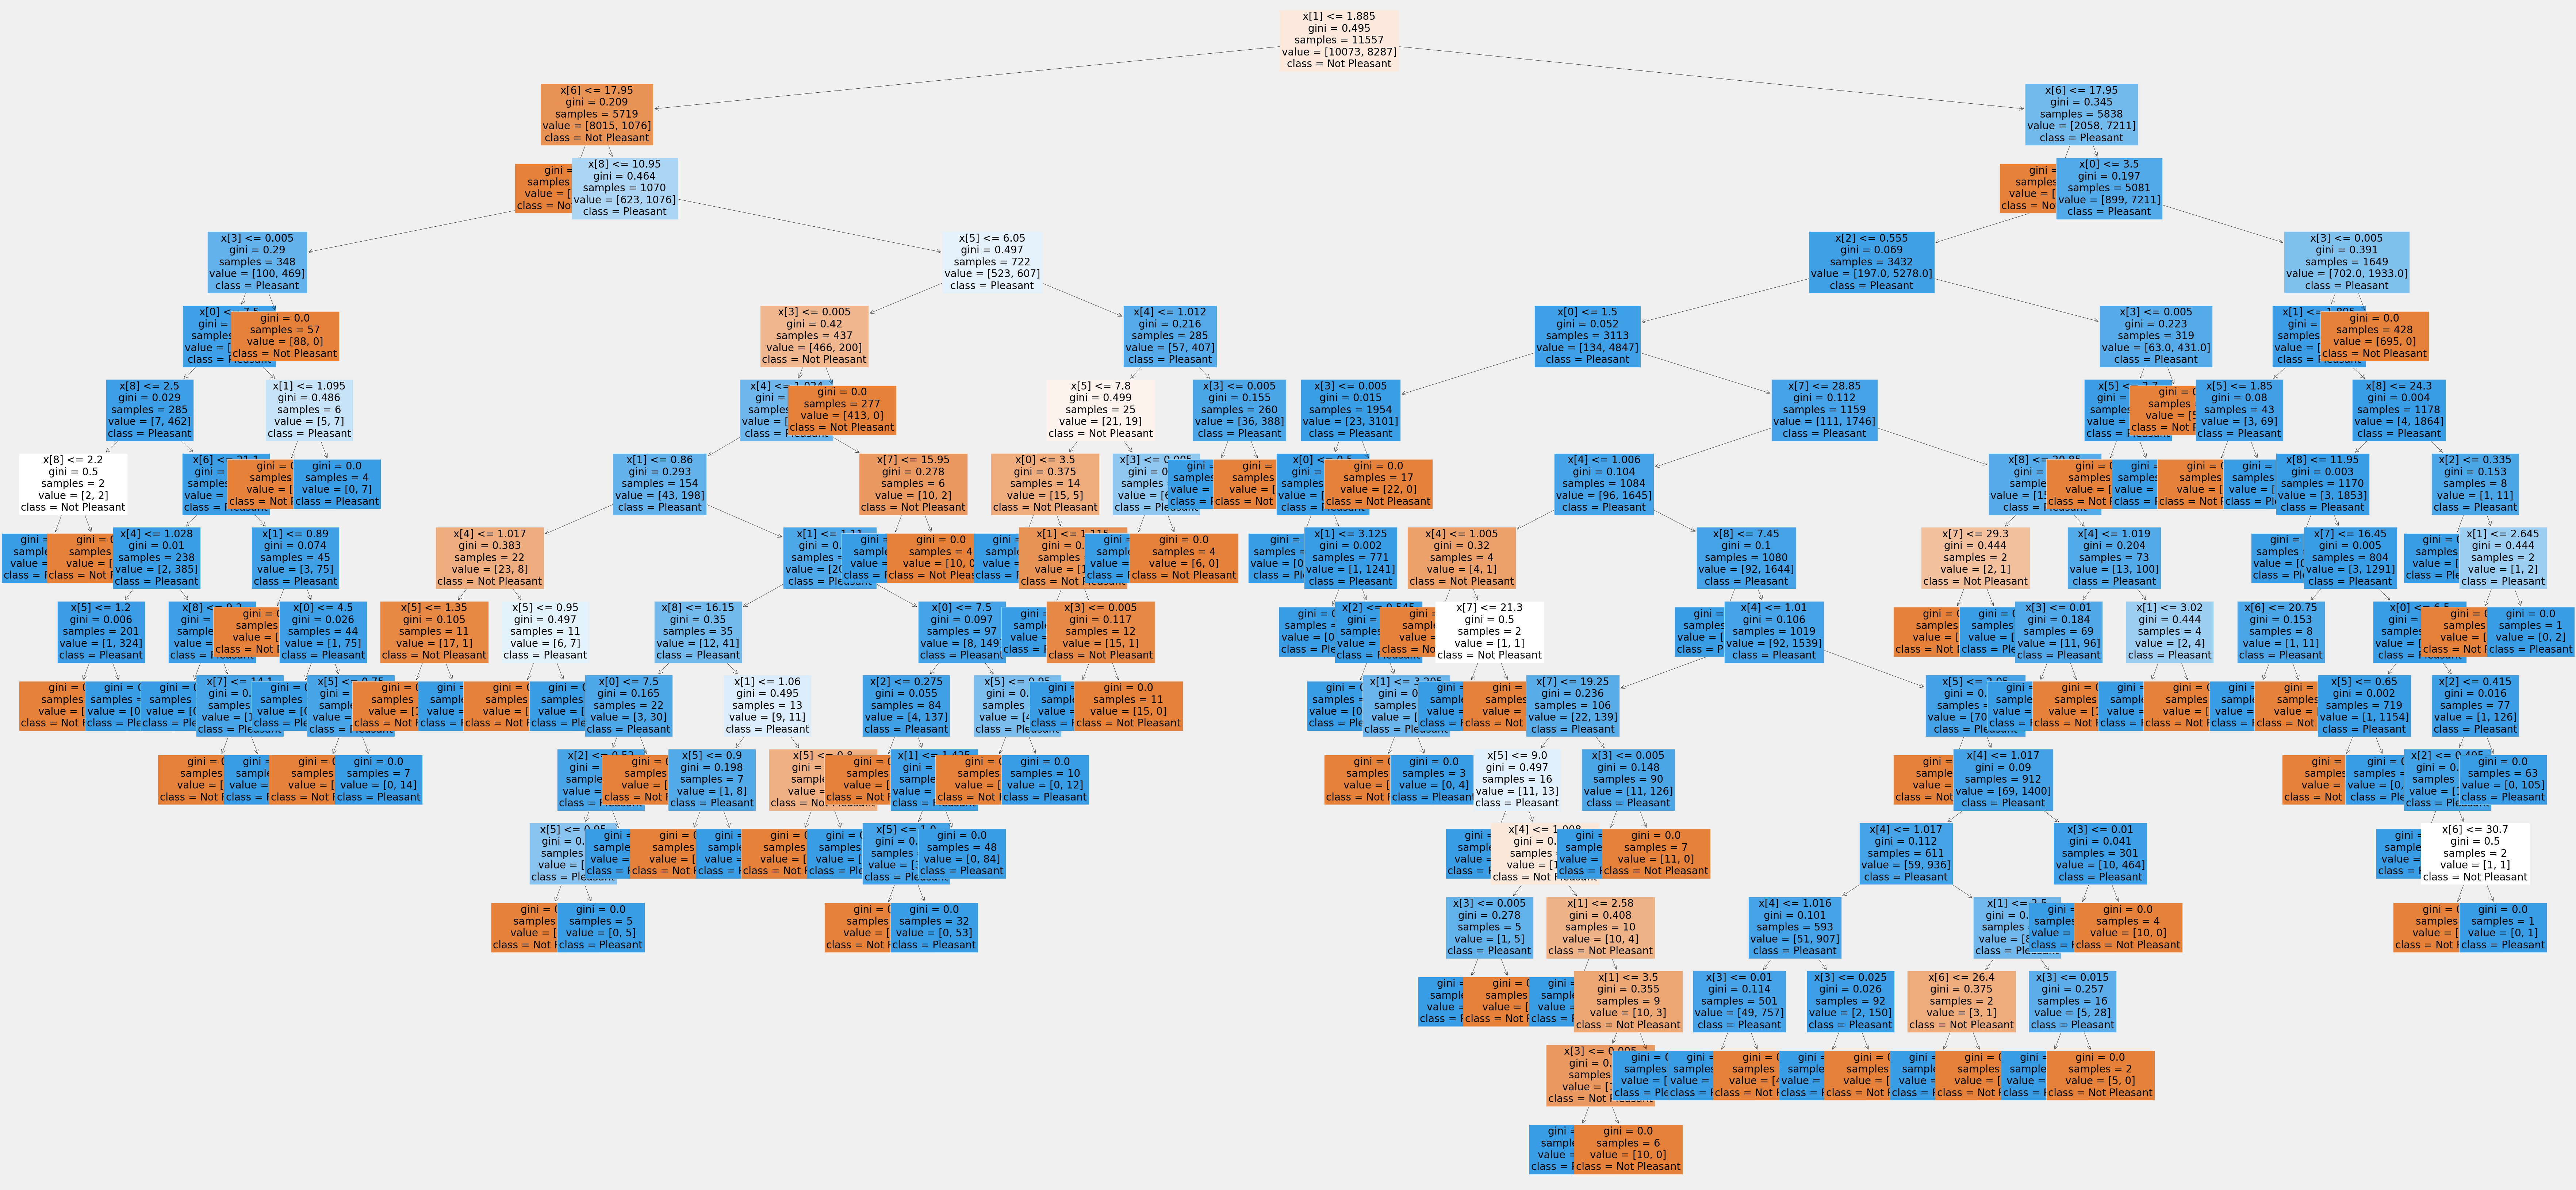

In [29]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=mad_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

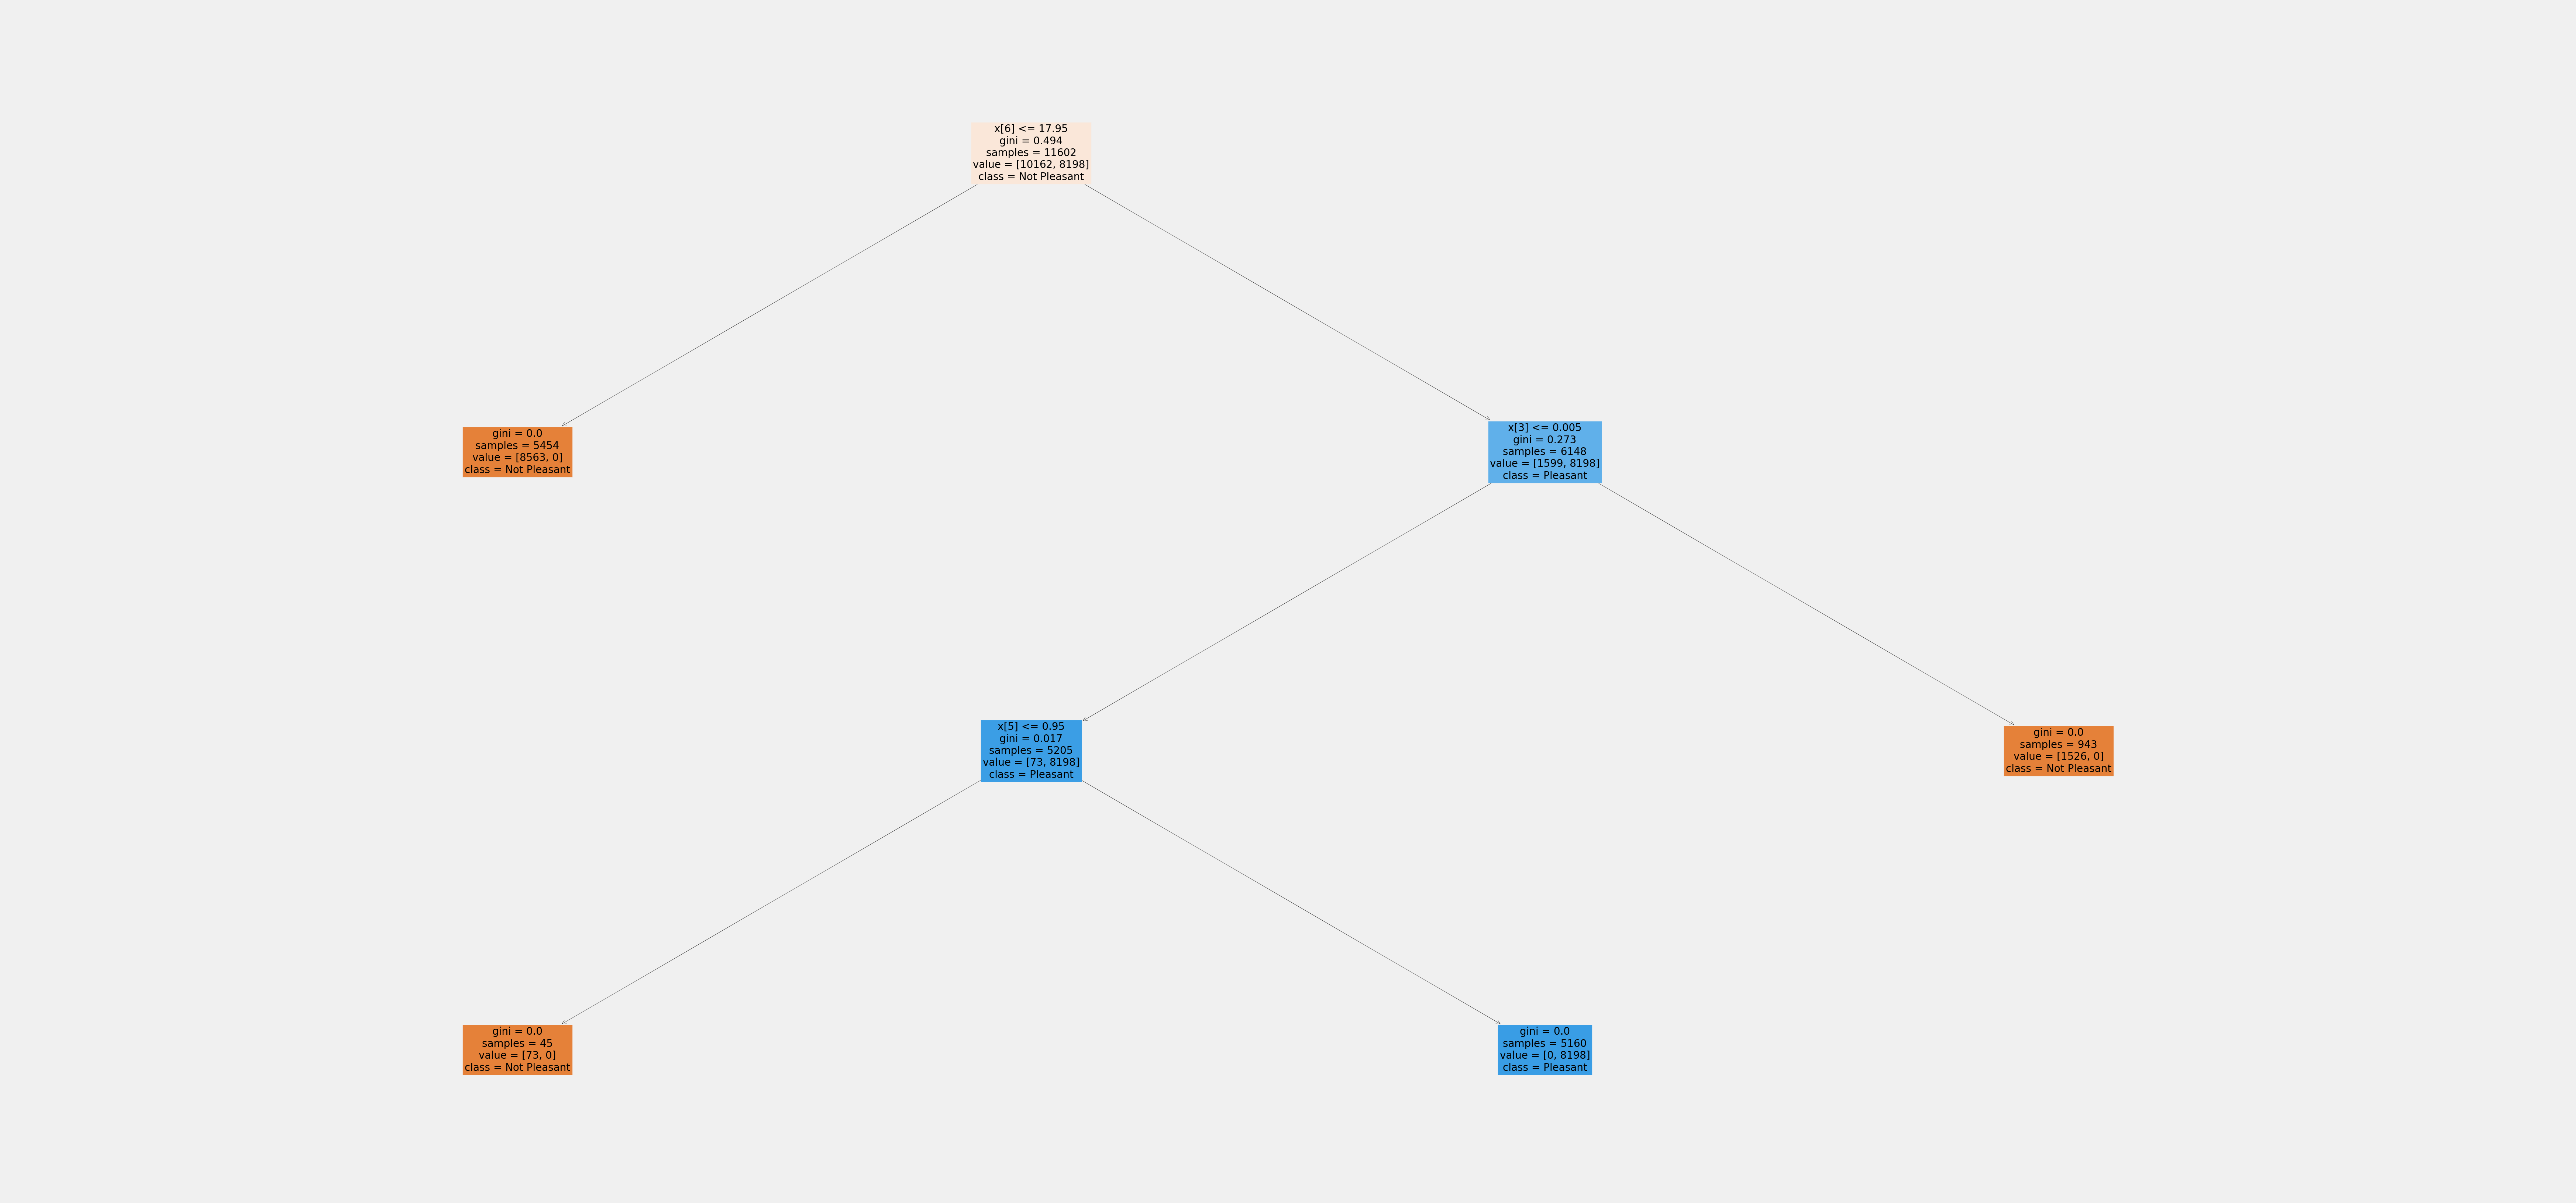

In [30]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=mad_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis
        - Madrid

In [21]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01623224, 0.07036904, 0.03464248, 0.21451306, 0.00418814,
       0.09807352, 0.30418011, 0.21455484, 0.04324658])

In [22]:
np.set_printoptions(threshold=1000)

In [23]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.01623224, 0.07036904, 0.03464248, 0.21451306, 0.00418814,
         0.09807352, 0.30418011, 0.21455484, 0.04324658]]])

In [24]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.01623224, 0.07036904, 0.03464248, 0.21451306, 0.00418814,
       0.09807352, 0.30418011, 0.21455484, 0.04324658])

In [25]:
important = pd.Series(sumarray, index = mad_cols) #.sort_values(ascending = False)
important

MADRID_cloud_cover         0.016232
MADRID_global_radiation    0.070369
MADRID_humidity            0.034642
MADRID_precipitation       0.214513
MADRID_pressure            0.004188
MADRID_sunshine            0.098074
MADRID_temp_max            0.304180
MADRID_temp_mean           0.214555
MADRID_temp_min            0.043247
dtype: float64

Index(['MADRID_cloud_cover', 'MADRID_global_radiation', 'MADRID_humidity',
       'MADRID_precipitation', 'MADRID_pressure', 'MADRID_sunshine',
       'MADRID_temp_max', 'MADRID_temp_mean', 'MADRID_temp_min'],
      dtype='object')


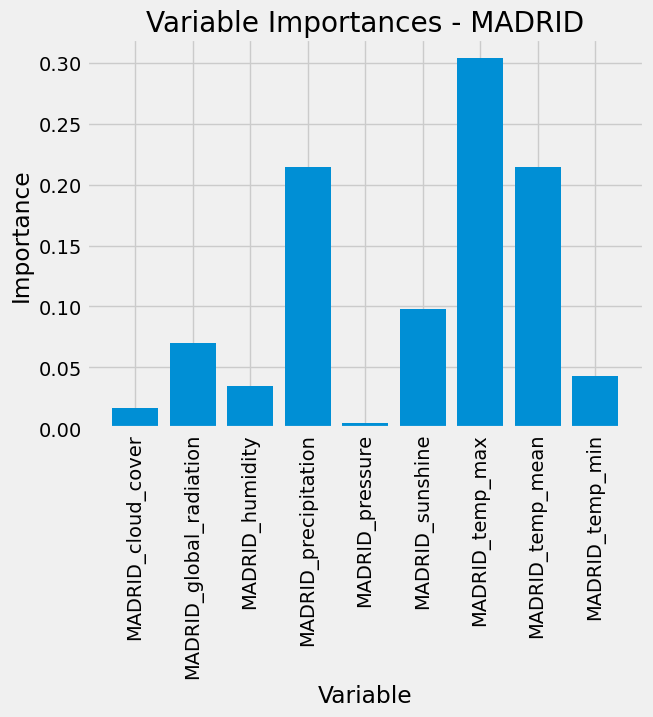

In [26]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(mad_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, mad_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - MADRID');

- **Notes:** Top features of importances are for MADRID weather station are:

        1. Temperature max
        2. Temperature mean
        3. Precipitation

---------------------------------------------------------------------------------------------------------------------------
